In [188]:
import pandas as pd
import os

path = os.getcwd()+"\dataset\Fake_News\Fake_News.csv"
path

'C:\\Users\\hp\\dataset\\Fake_News\\Fake_News.csv'

In [189]:
#Data Exploration

df = pd.read_csv(path, index_col=0)
 
df.shape  

(6335, 3)

In [190]:
df.head(2)  

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE


In [191]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [212]:
y = df["label"]

# Drop the `label` column
df.drop("label", axis=1).head(5)

,title,text
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [216]:
from sklearn.model_selection import train_test_split

# Make training and test sets 
x_train, x_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.3, random_state=53)


In [217]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(x_train) 

# Transform the test set 
count_test = count_vectorizer.transform(x_test)

In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(x_test)

In [219]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])


['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [220]:
# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000billion', '000ft']


In [200]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [201]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())       #DANGER

In [202]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [203]:
print(count_df.equals(tfidf_df))

False


In [204]:
count_df.head(5)

,00,000,0000,00000031,000035,00006,0001,0001pt,000billion,000ft,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
tfidf_df.head(5)

,00,000,0000,00000031,000035,00006,0001,0001pt,000billion,000ft,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.041696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.031448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.014377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(tfidf_train, y_train)

pred = model.predict(tfidf_test)


In [223]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, pred)*100)


86.32298790110468


In [224]:

print(metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL']))

[[677 236]
 [ 24 964]]


In [225]:
print(metrics.classification_report(y_test, pred))

             precision    recall  f1-score   support

       FAKE       0.97      0.74      0.84       913
       REAL       0.80      0.98      0.88       988

avg / total       0.88      0.86      0.86      1901



In [214]:
#Top 30 News
Result = pd.DataFrame({"News": list(X_test), "Label": list(pred)})

In [215]:
Result.head(30)

,News,Label
0,Donald Trump threatened to sue the New York Ti...,REAL
1,Planned Parenthood: Abortion pill usage now ri...,REAL
2,"In a last dash, final ""hail mary"" attempt to e...",REAL
3,Washington (CNN) Donald Trump and Ben Carson n...,REAL
4,The Obama administration announced Friday it w...,REAL
5,Three local military veterans to receive rec...,FAKE
6,Home This Month Popular What The Trump Skeptic...,REAL
7,But then the sobering realization sets in: the...,REAL
8,"Killing Obama administration rules, dismantlin...",REAL
9,"The party looks to Kamala Harris, Catherine Co...",REAL


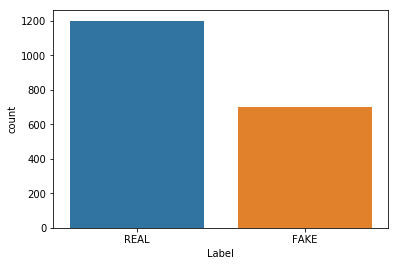

In [228]:
import seaborn as sns

sns.countplot(Result["Label"])